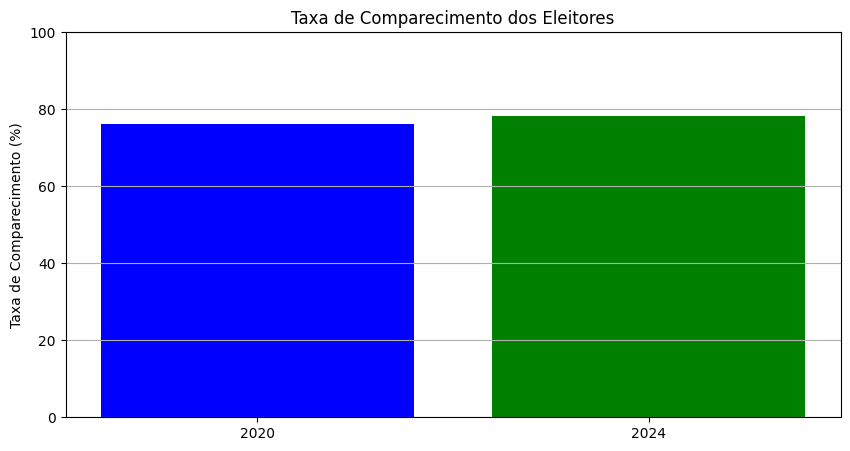

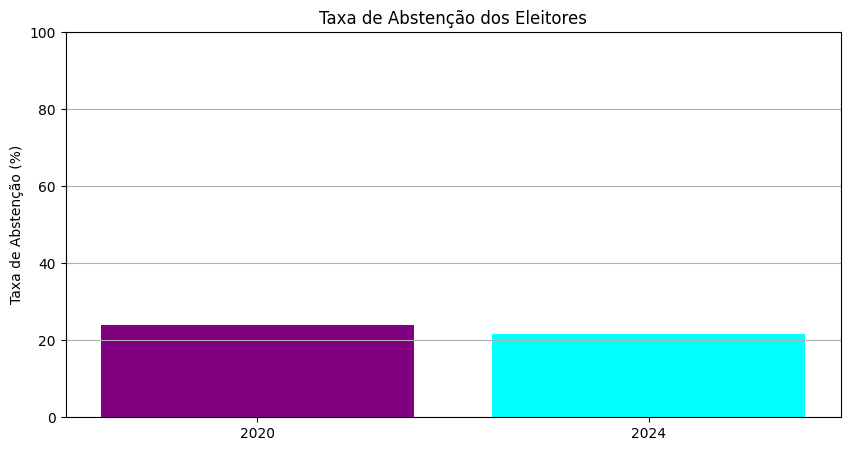

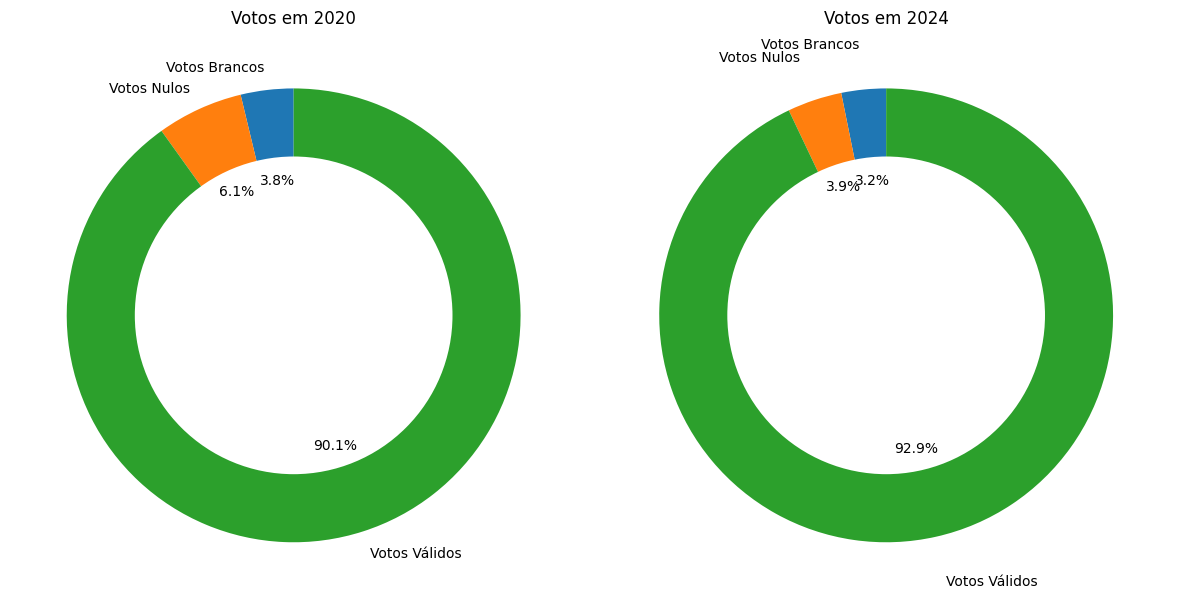

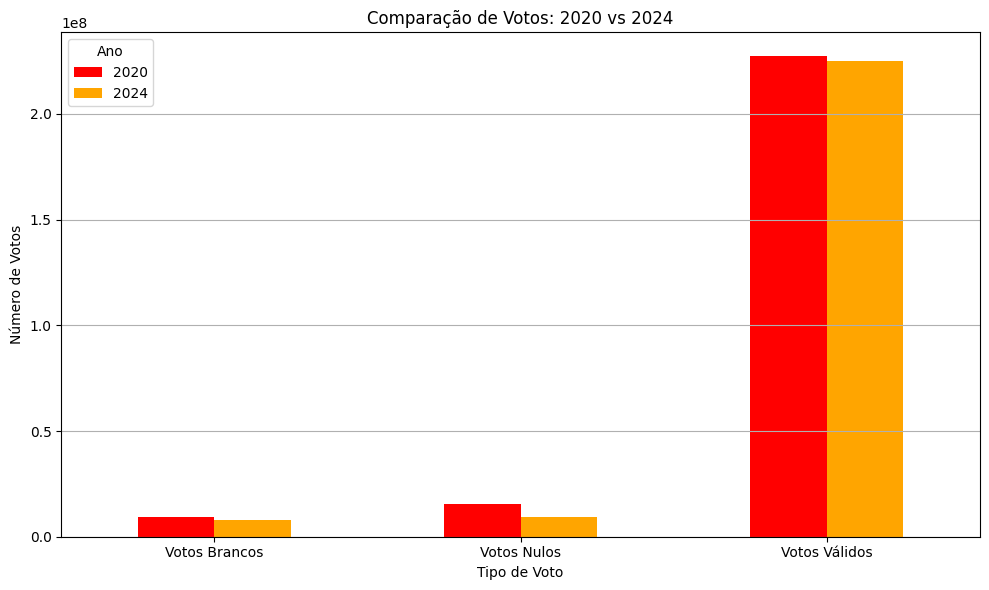

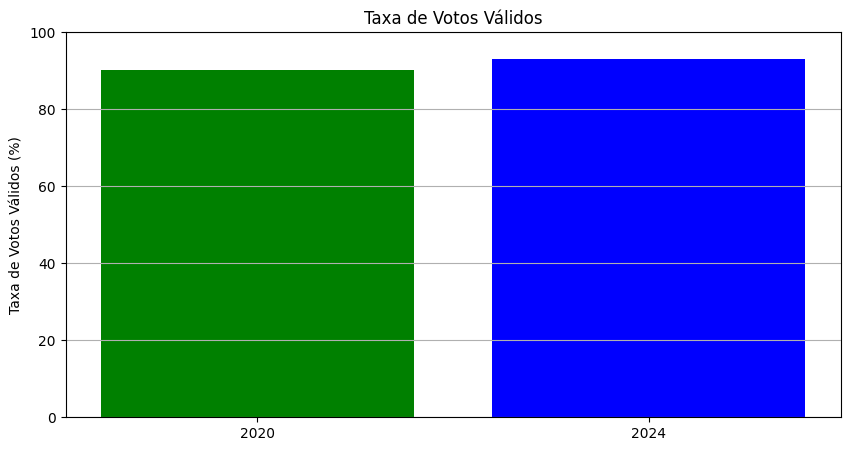

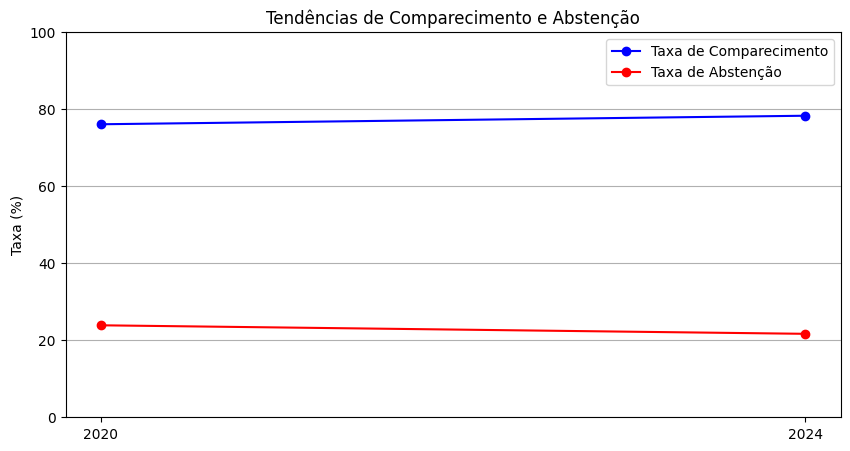

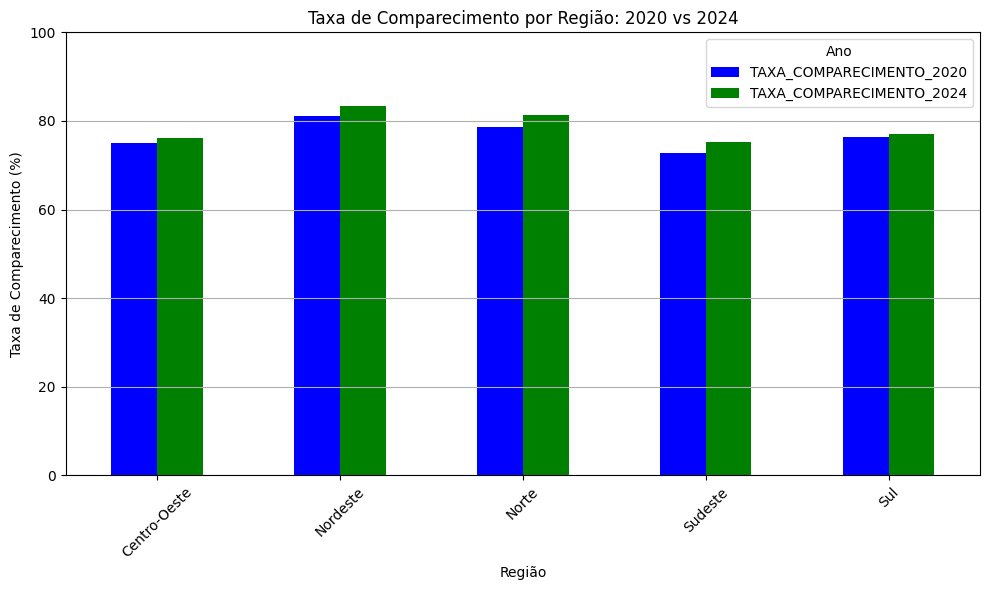

<Figure size 1200x800 with 0 Axes>

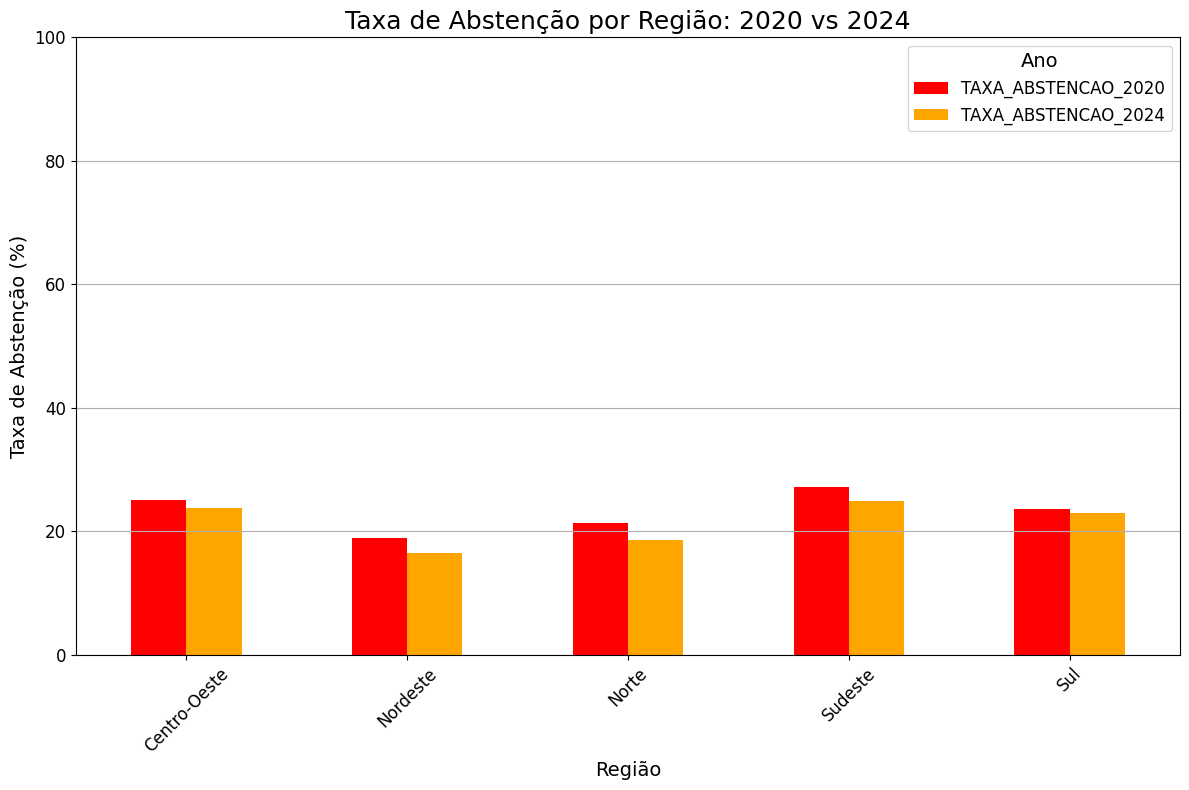

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os arquivos CSV
file_path_2020 = 'data/detalhe_votacao_munzona_2020_BRASIL.csv'
file_path_2024 = 'data/detalhe_votacao_munzona_2024_BRASIL.csv'

df_2020 = pd.read_csv(file_path_2020, sep=';', encoding='latin1')
df_2024 = pd.read_csv(file_path_2024, sep=';', encoding='latin1')

# 1. Comparação do Comparecimento
comparecimento_2020 = df_2020['QT_COMPARECIMENTO'].sum()
comparecimento_2024 = df_2024['QT_COMPARECIMENTO'].sum()
eleitores_aptos_2020 = df_2020['QT_APTOS'].sum()
eleitores_aptos_2024 = df_2024['QT_APTOS'].sum()

taxa_comparecimento_2020 = (comparecimento_2020 / eleitores_aptos_2020) * 100
taxa_comparecimento_2024 = (comparecimento_2024 / eleitores_aptos_2024) * 100

# 2. Análise de Abstenções
abstencao_2020 = df_2020['QT_ABSTENCOES'].sum()
abstencao_2024 = df_2024['QT_ABSTENCOES'].sum()

taxa_abstencao_2020 = (abstencao_2020 / eleitores_aptos_2020) * 100
taxa_abstencao_2024 = (abstencao_2024 / eleitores_aptos_2024) * 100

# 3. Visualização das Taxas de Comparecimento
plt.figure(figsize=(10, 5))
plt.bar(['2020', '2024'], [taxa_comparecimento_2020, taxa_comparecimento_2024], color=['blue', 'green'])
plt.title('Taxa de Comparecimento dos Eleitores')
plt.ylabel('Taxa de Comparecimento (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

# 4. Visualização da Taxa de Abstenção
plt.figure(figsize=(10, 5))
plt.bar(['2020', '2024'], [taxa_abstencao_2020, taxa_abstencao_2024], color=['purple', 'cyan'])
plt.title('Taxa de Abstenção dos Eleitores')
plt.ylabel('Taxa de Abstenção (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

# Calcula o número total de votos brancos, nulos e válidos para 2020 e 2024
votos_2020 = {
    'Votos Brancos': df_2020['QT_VOTOS_BRANCOS'].sum(),
    'Votos Nulos': df_2020['QT_TOTAL_VOTOS_NULOS'].sum(),
    'Votos Válidos': df_2020['QT_TOTAL_VOTOS_VALIDOS'].sum()
}
votos_2024 = {
    'Votos Brancos': df_2024['QT_VOTOS_BRANCOS'].sum(),
    'Votos Nulos': df_2024['QT_TOTAL_VOTOS_NULOS'].sum(),
    'Votos Válidos': df_2024['QT_TOTAL_VOTOS_VALIDOS'].sum()
}

# Criar DataFrame para comparação
df_votos = pd.DataFrame({
    '2020': votos_2020,
    '2024': votos_2024
})

# Gráficos de Pizza para 2020 e 2024
plt.figure(figsize=(12, 6))

# Gráfico de Pizza para 2020
plt.subplot(1, 2, 1)
plt.pie(df_votos['2020'], labels=df_votos.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Votos em 2020')

# Gráfico de Pizza para 2024
plt.subplot(1, 2, 2)
plt.pie(df_votos['2024'], labels=df_votos.index, autopct='%1.1f%%', startangle=90, labeldistance=1.2)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Votos em 2024')

plt.tight_layout()
plt.show()

# Gráfico de Barras Agrupadas para Comparação de Votos
df_votos.plot(kind='bar', color=['red', 'orange', 'green'], figsize=(10, 6))
plt.title('Comparação de Votos: 2020 vs 2024')
plt.ylabel('Número de Votos')
plt.xlabel('Tipo de Voto')
plt.xticks(rotation=0)
plt.legend(title='Ano')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Taxa de Votos Válidos
taxa_votos_validos_2020 = (votos_2020['Votos Válidos'] / sum(votos_2020.values())) * 100
taxa_votos_validos_2024 = (votos_2024['Votos Válidos'] / sum(votos_2024.values())) * 100

# Gráfico de Taxa de Votos Válidos
plt.figure(figsize=(10, 5))
plt.bar(['2020', '2024'], [taxa_votos_validos_2020, taxa_votos_validos_2024], color=['green', 'blue'])
plt.title('Taxa de Votos Válidos')
plt.ylabel('Taxa de Votos Válidos (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

# Análise de Tendências - Comparecimento e Abstenção
plt.figure(figsize=(10, 5))
plt.plot(['2020', '2024'], [taxa_comparecimento_2020, taxa_comparecimento_2024], marker='o', label='Taxa de Comparecimento', color='blue')
plt.plot(['2020', '2024'], [taxa_abstencao_2020, taxa_abstencao_2024], marker='o', label='Taxa de Abstenção', color='red')
plt.title('Tendências de Comparecimento e Abstenção')
plt.ylabel('Taxa (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.legend()
plt.show()


# Mapeando os estados para as regiões
estado_para_regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
    'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
    'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
    'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
    'SC': 'Sul', 'SE': 'Nordeste', 'SP': 'Sudeste', 'TO': 'Norte'
}

df_2020['REGIAO'] = df_2020['SG_UF'].map(estado_para_regiao)
df_2024['REGIAO'] = df_2024['SG_UF'].map(estado_para_regiao)

# Calcula taxas de comparecimento por região para 2020 e 2024
taxas_regionais_2020 = df_2020.groupby('REGIAO').agg({
    'QT_COMPARECIMENTO': 'sum',
    'QT_APTOS': 'sum'
}).reset_index()
taxas_regionais_2020['TAXA_COMPARECIMENTO'] = (taxas_regionais_2020['QT_COMPARECIMENTO'] / taxas_regionais_2020['QT_APTOS']) * 100

taxas_regionais_2024 = df_2024.groupby('REGIAO').agg({
    'QT_COMPARECIMENTO': 'sum',
    'QT_APTOS': 'sum'
}).reset_index()
taxas_regionais_2024['TAXA_COMPARECIMENTO'] = (taxas_regionais_2024['QT_COMPARECIMENTO'] / taxas_regionais_2024['QT_APTOS']) * 100


taxas_comparativas = pd.merge(
    taxas_regionais_2020[['REGIAO', 'TAXA_COMPARECIMENTO']],
    taxas_regionais_2024[['REGIAO', 'TAXA_COMPARECIMENTO']],
    on='REGIAO',
    suffixes=('_2020', '_2024')
)

# Gráfico de Barras Comparativo por Região
taxas_comparativas.set_index('REGIAO').plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Taxa de Comparecimento por Região: 2020 vs 2024')
plt.ylabel('Taxa de Comparecimento (%)')
plt.xlabel('Região')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

taxas_abstencao_2020 = df_2020.groupby('REGIAO').agg({
    'QT_ABSTENCOES': 'sum',
    'QT_APTOS': 'sum'
}).reset_index()
taxas_abstencao_2020['TAXA_ABSTENCAO'] = (taxas_abstencao_2020['QT_ABSTENCOES'] / taxas_abstencao_2020['QT_APTOS']) * 100

taxas_abstencao_2024 = df_2024.groupby('REGIAO').agg({
    'QT_ABSTENCOES': 'sum',
    'QT_APTOS': 'sum'
}).reset_index()
taxas_abstencao_2024['TAXA_ABSTENCAO'] = (taxas_abstencao_2024['QT_ABSTENCOES'] / taxas_abstencao_2024['QT_APTOS']) * 100


taxas_abstencao_comparativas = pd.merge(
    taxas_abstencao_2020[['REGIAO', 'TAXA_ABSTENCAO']],
    taxas_abstencao_2024[['REGIAO', 'TAXA_ABSTENCAO']],
    on='REGIAO',
    suffixes=('_2020', '_2024')
)

# Gráfico de Barras Comparativo da Taxa de Abstenção por Região
plt.figure(figsize=(12, 8))  # Aumenta ainda mais o tamanho da figura
taxas_abstencao_comparativas.set_index('REGIAO').plot(kind='bar', color=['red', 'orange'], figsize=(12, 8))
plt.title('Taxa de Abstenção por Região: 2020 vs 2024', fontsize=18)
plt.ylabel('Taxa de Abstenção (%)', fontsize=14)
plt.xlabel('Região', fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Ano', fontsize=12, title_fontsize=14)
plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout
plt.show()